In [8]:
from langchain.agents import initialize_agent, Tool
import os
from langchain_openai import OpenAI
from langchain_community.utilities import DuckDuckGoSearchAPIWrapper
from dotenv import load_dotenv

load_dotenv()

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")  



# Initialize the search tool
search = DuckDuckGoSearchAPIWrapper()
tools = [
    Tool(
        name="Search",
        func=search.run,
        description="Useful for answering questions about current events."
    )
]

# Initialize the agent
llm = OpenAI(temperature=0)
agent = initialize_agent(
    tools,
    llm,
    agent="zero-shot-react-description",
    verbose=True
)

# Run a query
agent.run("What's the latest news about AI advancements?")

C:\Users\ISB\AppData\Local\Temp\ipykernel_10648\4037423820.py:25: LangChainDeprecationWarning: LangChain agents will continue to be supported, but it is recommended for new use cases to be built with LangGraph. LangGraph offers a more flexible and full-featured framework for building agents, including support for tool-calling, persistence of state, and human-in-the-loop workflows. For details, refer to the `LangGraph documentation <https://langchain-ai.github.io/langgraph/>`_ as well as guides for `Migrating from AgentExecutor <https://python.langchain.com/docs/how_to/migrate_agent/>`_ and LangGraph's `Pre-built ReAct agent <https://langchain-ai.github.io/langgraph/how-tos/create-react-agent/>`_.
  agent = initialize_agent(
C:\Users\ISB\AppData\Local\Temp\ipykernel_10648\4037423820.py:33: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  agent.run("What's the latest news about AI advancements



> Entering new AgentExecutor chain...
 I should search for recent articles or news updates on AI advancements.
Action: Search
Action Input: "AI advancements"
Observation: It covers trends such as technical advancements in AI and public perceptions of the technology. In an effort to alleviate concerns around AI governance, the World Economic Forum has spearheaded the AI Governance Alliance. Artificial intelligence's (AI) influence on society has never been more pronounced. Since ChatGPT became a ubiquitous ... Discover the 10 major AI trends set to reshape 2025: from augmented working and real-time decision-making to advanced AI legislation and sustainable AI initiatives. Subscribe To Newsletters. Bullet points. This article summarizes Google's AI advancements in 2024, highlighting their commitment to responsible development. Google released Gemini 2.0, a powerful AI model designed for the "agentic era," and integrated it into various products. Learn how generative AI will evolve in 2

'The latest news about AI advancements includes trends such as technical advancements, public perceptions, and efforts towards responsible development and governance. Google has also released a powerful AI model and there are discussions about the challenges and opportunities of open source, GPU shortages, regulation, and ethical AI. Overall, AI is transforming how it integrates into our lives and work.'

In [9]:
from langchain.agents import AgentType, initialize_agent, Tool
from langchain_openai import OpenAI
from datetime import datetime

# Mock tools (replace with real APIs)
def mock_flight_search(query: str) -> str:
    """Simulate flight search."""
    return "Flights found: Delta $300 (June 1-3), United $320."

def mock_weather_check(query: str) -> str:
    """Simulate weather check."""
    return "Weather in Paris (June 1-3): Sunny, 22°C."

def mock_event_lookup(query: str) -> str:
    """Simulate event calendar."""
    return "Free events: Louvre Museum (June 2), Jazz Festival (June 3)."

# Define tools
tools = [
    Tool(
        name="FlightSearch",
        func=mock_flight_search,
        description="Search for flights by date and destination."
    ),
    Tool(
        name="WeatherCheck",
        func=mock_weather_check,
        description="Check weather forecasts for a location and date."
    ),
    Tool(
        name="EventLookup",
        func=mock_event_lookup,
        description="Find local events and activities."
    )
]

# Initialize agent
llm = OpenAI(temperature=0.3)
agent = initialize_agent(
    tools,
    llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True
)

# Run the agent
response = agent.run(
    "Plan a 3-day budget trip to Paris in June 2024."
)
print(response)



> Entering new AgentExecutor chain...
 I should start by looking for flights and checking the weather forecast for June 2024 in Paris.
Action: FlightSearch
Action Input: "Paris, June 2024"
Observation: Flights found: Delta $300 (June 1-3), United $320.
Thought: I should also check the weather forecast for June 2024 in Paris.
Action: WeatherCheck
Action Input: "Paris, June 2024"
Observation: Weather in Paris (June 1-3): Sunny, 22°C.
Thought: I should also look for local events and activities during that time.
Action: EventLookup
Action Input: "Paris, June 2024"
Observation: Free events: Louvre Museum (June 2), Jazz Festival (June 3).
Thought: I now know the final answer: I can take a Delta flight for $300 and enjoy sunny weather while visiting the Louvre Museum and attending the Jazz Festival during my 3-day budget trip to Paris in June 2024.
Final Answer: The final answer is to take a Delta flight for $300 and enjoy sunny weather while visiting the Louvre Museum and attending the Jaz

In [11]:
from langchain.agents import Tool, initialize_agent, AgentType
from langchain_openai import OpenAI
from transformers import pipeline

# Initialize toxicity classifier
toxicity_classifier = pipeline(
    "text-classification",
    model="unitary/toxic-bert",
    return_all_scores=True
)

def check_toxicity(text: str) -> str:
    """Check if text is toxic."""
    results = toxicity_classifier(text)
    toxic_score = [res['score'] for res in results[0] if res['label'] == 'toxic'][0]
    return f"Toxicity score: {toxic_score:.2f} (Flag if > 0.5)."

# Define tools
tools = [
    Tool(
        name="ToxicityChecker",
        func=check_toxicity,
        description="Check if text contains toxic language."
    )
]

# Initialize agent
llm = OpenAI(temperature=0)
agent = initialize_agent(
    tools,
    llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True
)

# Test comments
comments = [
    "You’re a failure!",
    "Great job on the project!"
]

for comment in comments:
    print(f"\nComment: '{comment}'")
    response = agent.run(f"Should we flag this comment? '{comment}'")
    print(f"Decision: {response}")

c:\Users\ISB\Desktop\Agents\.venv\lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ISB\.cache\huggingface\hub\models--unitary--toxic-bert. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Device set to use cpu
c:\Users\ISB\Desktop\Agents\.venv\lib\site-packages\transformers\pipelines\text_classification.p


Comment: 'You’re a failure!'


> Entering new AgentExecutor chain...
 This comment contains toxic language, so we should check it.
Action: ToxicityChecker
Action Input: 'You’re a failure!'
Observation: Toxicity score: 0.96 (Flag if > 0.5).
Thought: The toxicity score is above 0.5, so we should flag this comment.
Final Answer: Yes, we should flag this comment.

> Finished chain.
Decision: Yes, we should flag this comment.

Comment: 'Great job on the project!'


> Entering new AgentExecutor chain...
 It's always important to consider the context and tone of a comment before flagging it.
Action: ToxicityChecker
Action Input: 'Great job on the project!'
Observation: Toxicity score: 0.00 (Flag if > 0.5).
Thought: Based on the low toxicity score, it is not necessary to flag this comment.
Final Answer: No, we should not flag this comment.

> Finished chain.
Decision: No, we should not flag this comment.


In [13]:
import os
import requests
from langchain.agents import Tool, initialize_agent, AgentType
from langchain_openai import OpenAI
from dotenv import load_dotenv

load_dotenv()


os.environ["AMADEUS_API_KEY"] =os.getenv('AMADEUS_API_key')
os.environ["OPENWEATHER_API_KEY"] =os.getenv("OPENWEATHER_API_KEY")
os.environ["AMADEUS_API_SECRET"] =os.getenv("AMADEUS_API_SECRET")
# ----------------------
# Real API Integrations
# ----------------------

def get_amadeus_access_token():
    """Get an OAuth2 access token from Amadeus API."""
    url = "https://test.api.amadeus.com/v1/security/oauth2/token"
    headers = {"Content-Type": "application/x-www-form-urlencoded"}
    data = {
        "grant_type": "client_credentials",
        "client_id": os.getenv("AMADEUS_API_KEY"),
        "client_secret": os.getenv("AMADEUS_API_SECRET"),
    }
    response = requests.post(url, headers=headers, data=data)
    token_data = response.json()
    return token_data.get("access_token")

def get_flights(query: str) -> str:
    """Search real flights using Amadeus API."""
    access_token = get_amadeus_access_token()
    if not access_token:
        return "Error: Unable to authenticate with Amadeus API."

    # Extract destination and date from query
    destination, date = "PAR", "2025-02-01"  # Parse from `query` dynamically

    headers = {"Authorization": f"Bearer {access_token}"}
    params = {
        "originLocationCode": "NYC",
        "destinationLocationCode": destination,
        "departureDate": date,
        "adults": "1",
        "currencyCode": "USD",
    }
    response = requests.get(
        "https://test.api.amadeus.com/v2/shopping/flight-offers",
        headers=headers,
        params=params
    )
    data = response.json()

    flights = data.get("data", [])
    if not flights:
        return "No flights found."

    return f"Flights to {destination}: " + ", ".join([f"${flight['price']['total']}" for flight in flights[:3]])

def get_weather(query: str) -> str:
    """Get real weather using OpenWeatherMap API."""
    city = "Paris"
    response = requests.get(
        f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={os.getenv('OPENWEATHER_API_KEY')}&units=metric"
    )
    data = response.json()
    weather = data.get("weather", [{}])[0].get("description", "unknown")
    temp = data.get("main", {}).get("temp", "unknown")
    return f"Weather: {weather}, {temp}°C"


# ----------------------
# Agent Setup
# ----------------------
tools = [
    Tool(
        name="FlightSearch",
        func=get_flights,
        description="Search for flights by destination and date."
    ),
    Tool(
        name="WeatherCheck",
        func=get_weather,
        description="Check weather forecasts for a city."
    ),

]

llm = OpenAI(temperature=0.3)
agent = initialize_agent(
    tools,
    llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True
)

# Run the agent
response = agent.run("what is the price of Ticket to Paris in Febuarary 2025 and also what are the weather conditions?")
print(response)



> Entering new AgentExecutor chain...
 I should use FlightSearch to find the price of a ticket and WeatherCheck to check the weather conditions.
Action: FlightSearch
Action Input: "Paris, February 2025"
Observation: Flights to PAR: $60.50, $130.60, $130.60
Thought: I should use the first flight price as the final price.
Action: WeatherCheck
Action Input: "Paris"
Observation: Weather: light snow, 1.66°C
Thought: I now know the final answer.
Final Answer: The price of a ticket to Paris in February 2025 is $60.50 and the weather conditions are light snow with a temperature of 1.66°C.

> Finished chain.
The price of a ticket to Paris in February 2025 is $60.50 and the weather conditions are light snow with a temperature of 1.66°C.


In [14]:
from langchain_openai import OpenAI
from langchain_community.utilities import DuckDuckGoSearchAPIWrapper
from langgraph.graph import StateGraph
from typing import TypedDict, Optional

# Define state schema
class AgentState(TypedDict):
    query: str
    search_needed: bool
    search_result: Optional[str]
    search_valid: bool
    summarized_result: Optional[str]
    final_answer: Optional[str]
    verified_answer: Optional[str]

# Initialize tools
search = DuckDuckGoSearchAPIWrapper()
llm = OpenAI(temperature=0.3)
workflow = StateGraph(AgentState)

# Define node functions
def determine_search(state: AgentState) -> AgentState:
    prompt = f"Does this query require a web search? Answer 'yes' or 'no': {state['query']}"
    response = llm.invoke(prompt).strip().lower()
    state["search_needed"] = response == "yes"
    return state

def perform_search(state: AgentState) -> AgentState:
    if state["search_needed"]:
        state["search_result"] = search.run(state["query"])
    return state

def validate_search(state: AgentState) -> AgentState:
    if state["search_result"] and len(state["search_result"].strip()) > 10:
        state["search_valid"] = True
    else:
        state["search_valid"] = False
    return state

def summarize_search(state: AgentState) -> AgentState:
    if state["search_valid"]:
        prompt = f"Summarize this search result in 2-3 sentences:\n{state['search_result']}"
        state["summarized_result"] = llm.invoke(prompt)
    return state

def generate_final_answer(state: AgentState) -> AgentState:
    context = (
        f"Summarized search result: {state['summarized_result']}"
        if state["summarized_result"]
        else "No valid search results found. Base your response on general knowledge."
    )
    prompt = f"Query: {state['query']}\n{context}\nProvide a detailed, fact-based answer."
    state["final_answer"] = llm.invoke(prompt)
    return state


def verify_final_answer(state: AgentState) -> AgentState:
    prompt = f"Assess the factual accuracy and clarity of the answer below. If mostly correct, respond 'yes'. If incorrect, explain why:\n{state['final_answer']}"
    verification = llm.invoke(prompt).strip().lower()
    state["verified_answer"] = state["final_answer"] if "yes" in verification else f"Unverified answer. Reason: {verification}"
    return state

# Add nodes to the workflow
workflow.add_node("determine_search", determine_search)
workflow.add_node("perform_search", perform_search)
workflow.add_node("validate_search", validate_search)
workflow.add_node("summarize_search", summarize_search)
workflow.add_node("generate_final_answer", generate_final_answer)
workflow.add_node("verify_final_answer", verify_final_answer)

# Define workflow edges
workflow.set_entry_point("determine_search")
workflow.add_edge("determine_search", "perform_search")
workflow.add_edge("perform_search", "validate_search")
workflow.add_edge("validate_search", "summarize_search")
workflow.add_edge("summarize_search", "generate_final_answer")
workflow.add_edge("generate_final_answer", "verify_final_answer")

# Compile and run
agent_executor = workflow.compile()
query = "What is the population of Tokyo, and what country is it in?"
final_state = agent_executor.invoke({
    "query": query,
    "search_needed": False,
    "search_result": None,
    "search_valid": False,
    "summarized_result": None,
    "final_answer": None,
    "verified_answer": None
})

print("\nFinal Answer:", final_state["verified_answer"])


Final Answer: 

As of 2021, the population of Tokyo, Japan is approximately 37.4 million people. This makes it the most populous city in Japan and the largest metropolitan area in the world.

Tokyo is located on the eastern coast of the island of Honshu, which is the largest and most populous island in Japan. It is the capital city of Japan and serves as the center of government, economy, and culture for the country.

Tokyo is known for its bustling city life, advanced technology, and rich history and culture. It is home to many famous landmarks such as the Tokyo Tower, Shibuya Crossing, and the Imperial Palace. The city also hosts numerous festivals and events throughout the year, attracting tourists from all over the world.

The population of Tokyo has been steadily increasing over the years, with a significant growth in the 20th century due to urbanization and economic development. The city continues to attract people from all over Japan and the world, making it a diverse and vibra

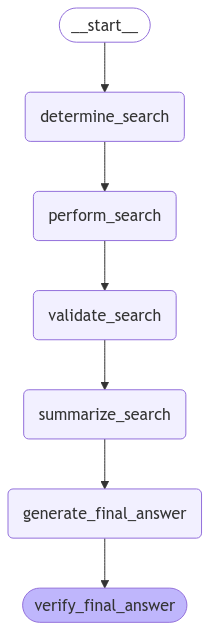

In [15]:
from IPython.display import Image, display

display(Image(agent_executor.get_graph().draw_mermaid_png()))